<a href="https://colab.research.google.com/github/anthonylhy/Machine-Learning-Projects/blob/master/FlightCancellationPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Load packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the data
from google.colab import files
files.upload()

Saving FlightDelays_Data_3.0.csv to FlightDelays_Data_3.0.csv


{'FlightDelays_Data_3.0.csv': b'\xef\xbb\xbfCanceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance\r\n1,12,814,UA,134,0,0,679\r\n1,12,830,DL,90,0,0,214\r\n1,1,1835,UA,213,0,0,1605\r\n1,4,1730,AA,80,0,0,235\r\n1,7,1442,UA,103,0,0,413\r\n1,2,820,DL,119,0,0,692\r\n1,1,1430,DL,70,0,0,214\r\n1,4,930,AA,155,0,0,1062\r\n1,4,1550,AA,130,0,0,813\r\n1,6,1725,DL,118,0,0,533\r\n1,3,1615,AA,100,0,0,551\r\n1,4,1010,AA,125,0,0,732\r\n1,9,1319,DL,131,0,0,732\r\n1,4,1755,AA,175,0,0,1012\r\n1,4,820,AA,140,0,0,927\r\n1,1,1955,AA,60,0,0,190\r\n1,11,1850,DL,90,0,0,403\r\n1,12,710,AA,245,0,0,1515\r\n1,7,913,UA,86,0,0,419\r\n1,10,1740,AA,245,0,0,1389\r\n1,7,2059,UA,130,0,0,719\r\n1,7,1925,AA,90,0,0,432\r\n1,6,2040,AA,165,0,0,1172\r\n1,8,1609,UA,92,0,0,419\r\n1,2,1940,UA,136,0,0,612\r\n1,2,1136,UA,154,0,0,948\r\n1,3,852,UA,283,0,0,1754\r\n1,5,1310,UA,116,0,0,642\r\n1,12,825,DL,154,0,0,745\r\n1,2,1705,AA,110,0,0,569\r\n1,1,820,DL,190,0,0,946\r\n1,4,1035,AA,140,0,0,929\r\n1,4,180

In [4]:
#Store the data
df = pd.read_csv('FlightDelays_Data_3.0.csv')
#Show the top 10 rows of data
df.head(10)

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1.0,12,814,UA,134.0,0.0,0,679.0
1,1.0,12,830,DL,90.0,0.0,0,214.0
2,1.0,1,1835,UA,213.0,0.0,0,1605.0
3,1.0,4,1730,AA,80.0,0.0,0,235.0
4,1.0,7,1442,UA,103.0,0.0,0,413.0
5,1.0,2,820,DL,119.0,0.0,0,692.0
6,1.0,1,1430,DL,70.0,0.0,0,214.0
7,1.0,4,930,AA,155.0,0.0,0,1062.0
8,1.0,4,1550,AA,130.0,0.0,0,813.0
9,1.0,6,1725,DL,118.0,0.0,0,533.0


In [5]:
#Count the columns and rows of data
df.shape

(6000, 8)

In [6]:
#Count the number of NAs in each columns
df.isna().sum()

Canceled            1
Month               0
DepartureTime       0
UniqueCarrier       0
SchedElapsedTime    2
ArrDelay            1
DepDelay            0
Distance            1
dtype: int64

In [7]:
#Columes with NAs would be drop since they are minimum. 
df = df.dropna()
#Get the new count of of rows and columns
df.shape

(5995, 8)

In [8]:
#Get a count of Canceled(1) and non-cancaled(0) flights
df['Canceled'].value_counts()

0.0    4996
1.0     999
Name: Canceled, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


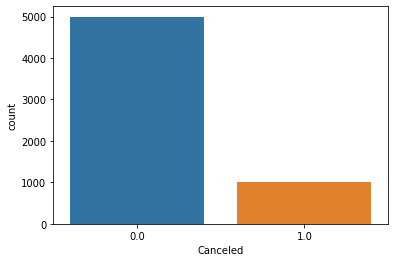

In [10]:
#Visualization the canceled flight vs non-canceled flight
sns.countplot(df['Canceled'], label = 'count')

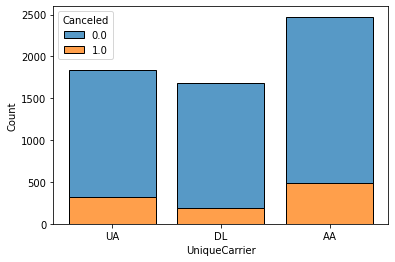

In [11]:
#Visualization of the Airlines and canceled flights
sns.histplot(data=df, x="UniqueCarrier", hue="Canceled",  multiple="stack", shrink=.8)

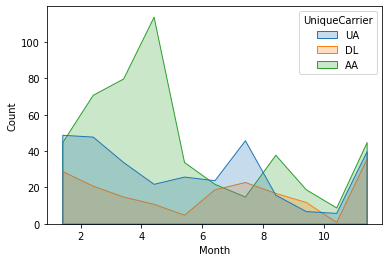

In [13]:
#It seems the Delta airlines is most reliable by having the least canceled flights, Let me dive deep into reliable flgihts per month
canceled = df[df['Canceled']==1]
reliable = df[df['Canceled']==0]

sns.histplot(data=canceled, x="Month", hue="UniqueCarrier", element="poly", shrink=.8)

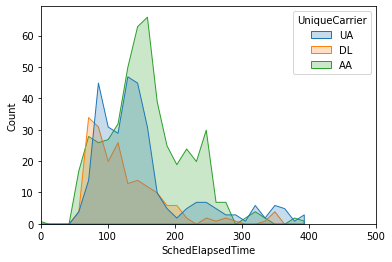

In [31]:
#SchedElapsedTime and canceled flights
plt.xlim(0, 500)
sns.histplot(data=canceled, x="SchedElapsedTime", hue="UniqueCarrier", element='poly' )

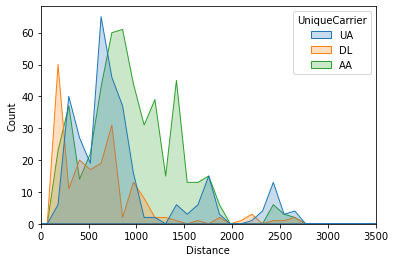

In [30]:
#Distince and canceled flights
plt.xlim(0, 3500)
sns.histplot(data=canceled, x="Distance", hue="UniqueCarrier", element='poly')

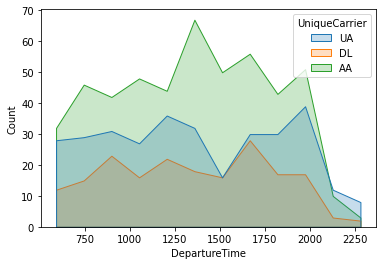

In [33]:
#DepartureTime and canceled flights
sns.histplot(data=canceled, x="DepartureTime", hue="UniqueCarrier", element='poly')

In [25]:
#Look at the data type and see which columns need to be encoded
df.dtypes

Canceled            float64
Month                 int64
DepartureTime         int64
UniqueCarrier         int64
SchedElapsedTime    float64
ArrDelay            float64
DepDelay              int64
Distance            float64
dtype: object

In [26]:
#Encode the categorical data values - UniqueCarrier
from sklearn.preprocessing import LabelEncoder
labelEncoder_Y = LabelEncoder()
df.iloc[:,3] = labelEncoder_Y.fit_transform(df.iloc[:,3].values)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


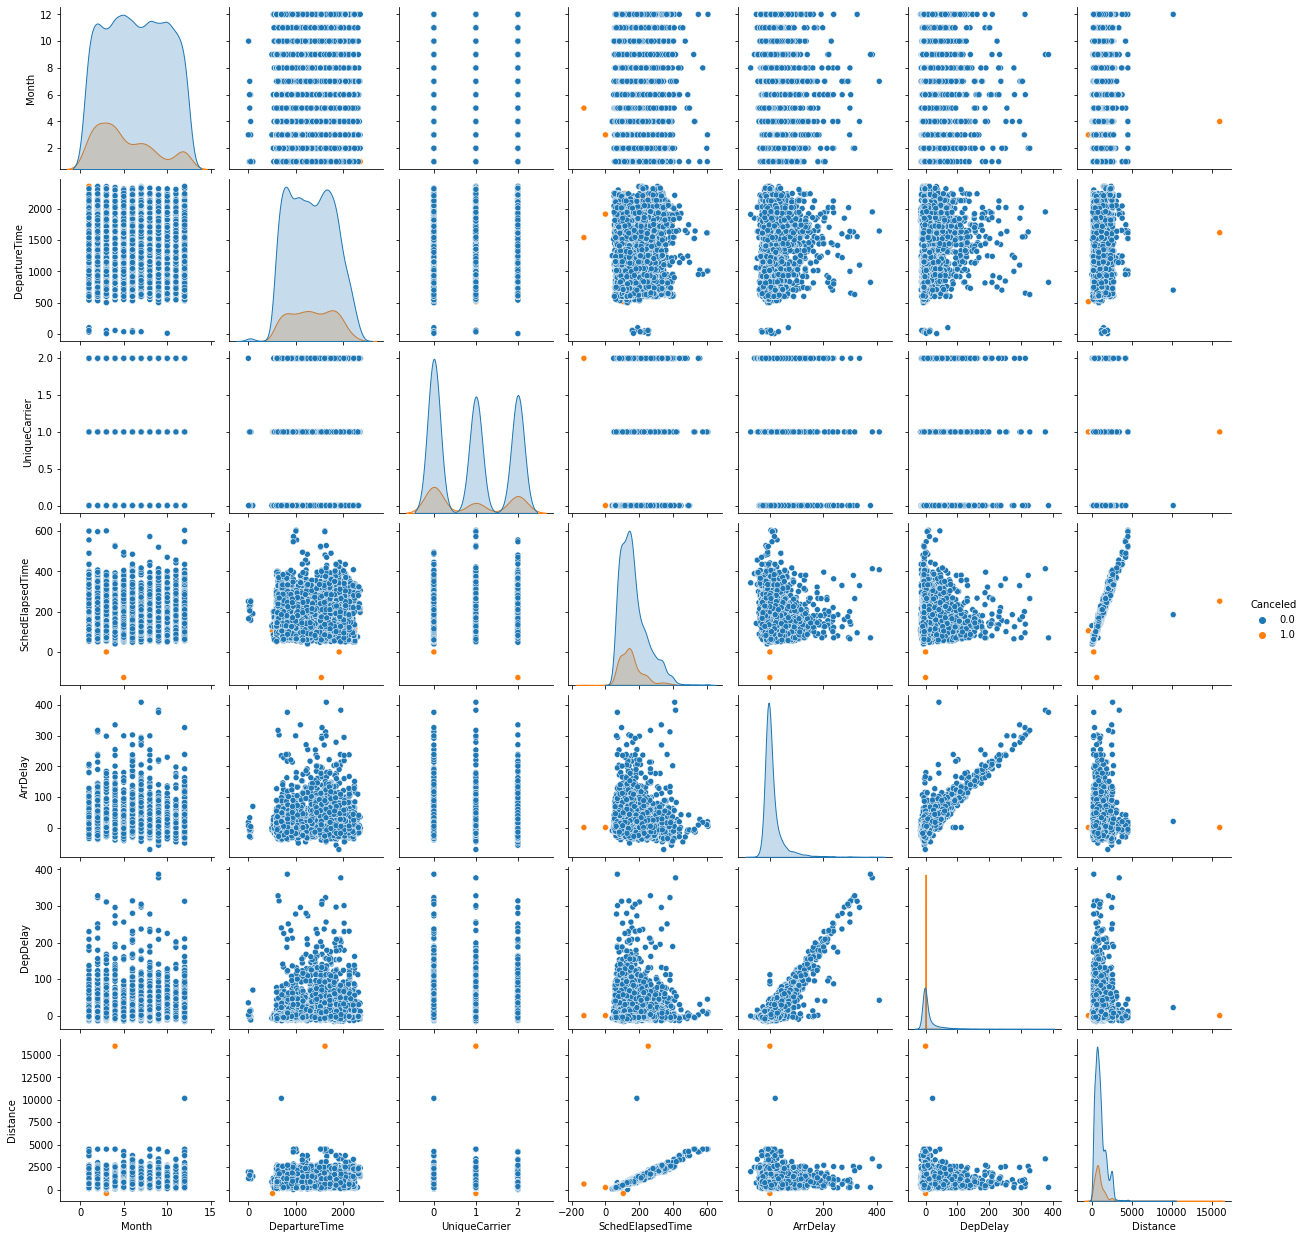

In [37]:
#Create the pair plot
sns.pairplot(df.iloc[:,0:8], hue='Canceled')

In [38]:
#Print the first 5 rows of new data
df.head(5)

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
0,1.0,12,814,2,134.0,0.0,0,679.0
1,1.0,12,830,1,90.0,0.0,0,214.0
2,1.0,1,1835,2,213.0,0.0,0,1605.0
3,1.0,4,1730,0,80.0,0.0,0,235.0
4,1.0,7,1442,2,103.0,0.0,0,413.0


In [39]:
#Get the coorelation of the columns
df.iloc[:,0:8].corr()

,Canceled,Month,DepartureTime,UniqueCarrier,SchedElapsedTime,ArrDelay,DepDelay,Distance
Canceled,1.000000,-0.136183,0.012233,-0.035849,-0.071294,-0.101457,-0.127802,-0.072429
Month,-0.136183,1.000000,-0.008793,0.008122,-0.019776,-0.024169,-0.015052,-0.016371
DepartureTime,0.012233,-0.008793,1.000000,0.009044,-0.017098,0.108367,0.136813,-0.017320
UniqueCarrier,-0.035849,0.008122,0.009044,1.000000,0.014741,-0.019317,0.012149,0.001836
SchedElapsedTime,-0.071294,-0.019776,-0.017098,0.014741,1.000000,0.009078,0.032254,0.930576
ArrDelay,-0.101457,-0.024169,0.108367,-0.019317,0.009078,1.000000,0.896274,0.006741
DepDelay,-0.127802,-0.015052,0.136813,0.012149,0.032254,0.896274,1.000000,0.027723
Distance,-0.072429,-0.016371,-0.017320,0.001836,0.930576,0.006741,0.027723,1.000000


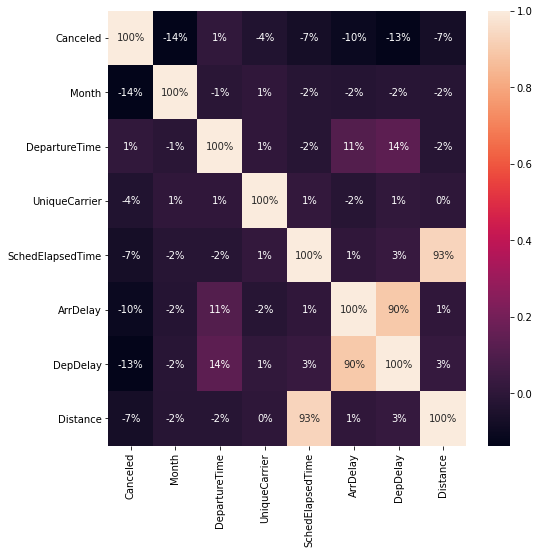

In [36]:
#Visualiza the coorelation
plt.figure(figsize=(8,8))
sns.heatmap(df.iloc[:,0:8].corr(), annot=True, fmt='.0%')

In [40]:
#Split the data set into independent (X) and depedent (Y) data sets
X = df.iloc[:,1:8].values
Y = df.iloc[:,0].values

In [41]:
#Split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25 , random_state = 0)

In [42]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [43]:
#Create a function for models
def models(X_train, Y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy' , random_state=0)
  tree.fit(X_train,Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train,Y_train)

  #Print the model accuracy on the training data
  print('[0]Logistic Regression Training Accuracy', log.score(X_train,Y_train))
  print('[1]Decision Tree Classifier Training Accuracy', tree.score(X_train,Y_train))
  print('[2]Random Forest Classifier Training Accuracy', forest.score(X_train,Y_train))

  return log, tree, forest

In [45]:
#Get all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy 0.8322953736654805
[1]Decision Tree Classifier Training Accuracy 1.0
[2]Random Forest Classifier Training Accuracy 0.9997775800711743


In [46]:
#Test models accuracy on test data on confusion metrix
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  print('Model' ,i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy = ', (TP+TN)/(TP+TN+FN+FP))
  print()

Model 0
[[1254    0]
 [ 245    0]]
Testing Accuracy =  0.8365577051367579

Model 1
[[1249    5]
 [   5  240]]
Testing Accuracy =  0.9933288859239493

Model 2
[[1250    4]
 [   5  240]]
Testing Accuracy =  0.9939959973315544



In [47]:
#Another way to get metrics for models on test data sets
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(model) ):
  print('Model' ,i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      1254
         1.0       0.00      0.00      0.00       245

    accuracy                           0.84      1499
   macro avg       0.42      0.50      0.46      1499
weighted avg       0.70      0.84      0.76      1499

0.8365577051367579

Model 1
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1254
         1.0       0.98      0.98      0.98       245

    accuracy                           0.99      1499
   macro avg       0.99      0.99      0.99      1499
weighted avg       0.99      0.99      0.99      1499

0.9933288859239493

Model 2
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1254
         1.0       0.98      0.98      0.98       245

    accuracy                           0.99      1499
   macro avg       0.99      0.99      0.99      1499
weighted a

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
#Since Random Forest Classifier was most accurate for test data set, print a function of Random Forest Classifier Model:
function = model[2].predict(X_test)
print(function)
print()
print(Y_test)

[0. 0. 0. ... 0. 0. 0.]

[0. 0. 0. ... 0. 0. 0.]
